# Running Power

Most equations taken from:

Van Dijk, H., & Van Megan, R. (2017). The Secret of Running. Meyer & Meyer Sport.

In [28]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Running Power Model

In [29]:
import matplotlib.pyplot as plt
import sys
import os
module_path = os.path.abspath(os.path.join('../source'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
import bonk
plotSize = (12,8)

athlete = bonk.Athlete()
environment = bonk.Environment()

### Power to Maintain Constant Velocity on Flat Ground
$$    {P_{base}} = {Ecor*mass*v}    $$

where ${Ecor}$ = energy cost of running

${v}$ = running speed

### Energy Cost of Running

Ecor varies slightly from runner to runner and represents the velocity independent energy required to travel a certain distance per unit mass. Ecor is closely related to the term "running economy"

Ecor ranges +/- a few percent, with a typical value of 0.98 kj/km/kg. It can be measured in a lab.

Ecor lumps together many hard to measure elements like internal work and the fraction energy recovery due to spring action of tendons.

Future improvements to the model should include a model of Ecor. For now Ecor is scaled with gravity to account for the fact that the majority of Ecor comes from center of mass vertical motion (changing gravitational potential energy).

### Power due to Aerodynamic Drag
$$    {P_{drag}} = {\frac{1}{2}}{\rho}{C_{d}}{A}{(v+v_{wind})}^2{v}    $$

where ${v_{wind}}$ is headwind speed (negative values are tailwind)

${\rho}$ is air density
${C_{d}}$ is drag coefficient
${A}$ is frontal area



### Power due to Slope

### Total Power

$$  {P_{total}} = {P_{base}+P_{drag}+P_{slope}}$$

### Solving for V

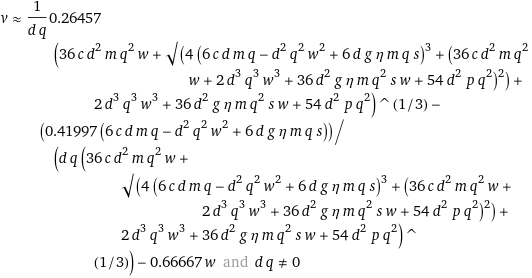

${c}$ is Ecor

${m}$ is mass

${d}$ is air density

${q}$ is CdA

${p}$ is power

${s}$ is slope

${g}$ is acceleration due to gravity

${v}$ is running speed

${w}$ is headwind velocity

${\eta}$ is slope efficiency


### Unmodeled Factors

## Runner Capability Model

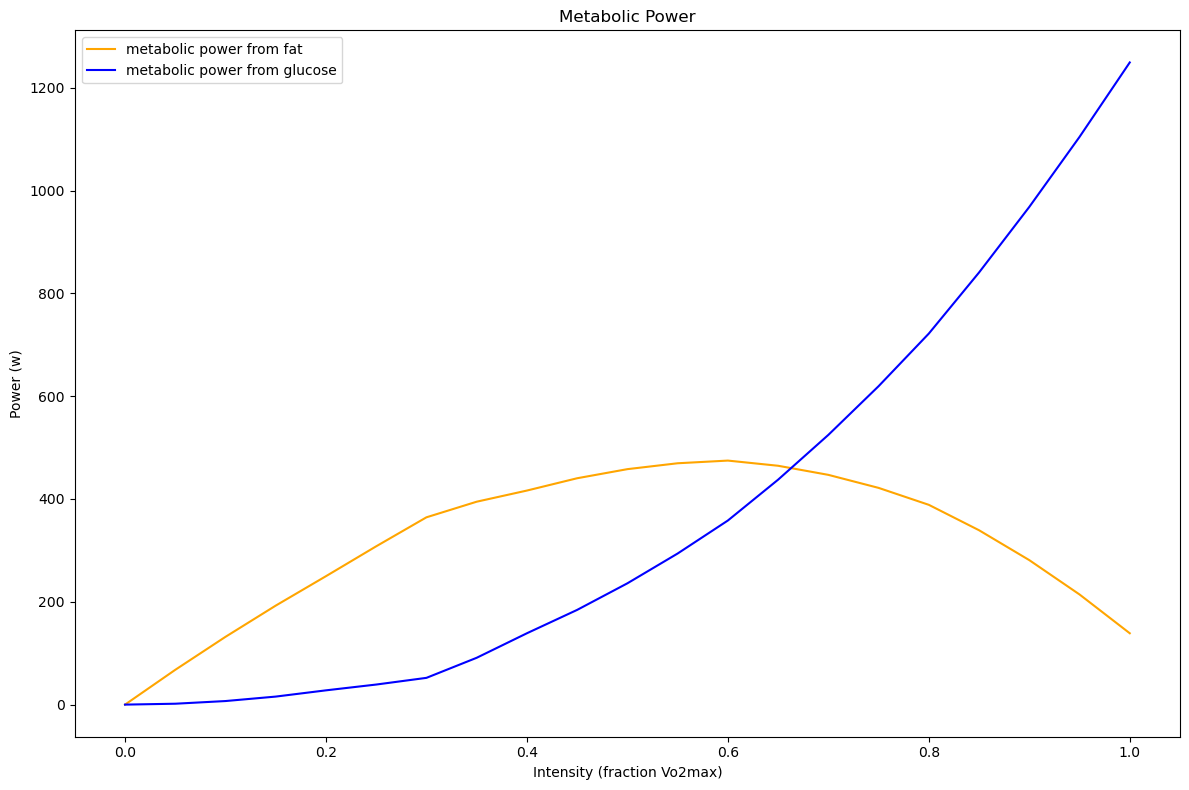

In [30]:
fig1, ax1 = plt.subplots(figsize=plotSize)
ax1.plot(athlete.powerDuration.fractionVo2,athlete.powerDuration.metabolicPowerFat,color='orange',label='metabolic power from fat')
ax1.plot(athlete.powerDuration.fractionVo2,athlete.powerDuration.metabolicPowerGlucose,color='blue',label='metabolic power from glucose')
ax1.legend()
ax1.set_title('Metabolic Power')
ax1.set_xlabel('Intensity (fraction Vo2max)')
ax1.set_ylabel('Power (w)')
fig1.tight_layout()

### Power - Duration Relationship

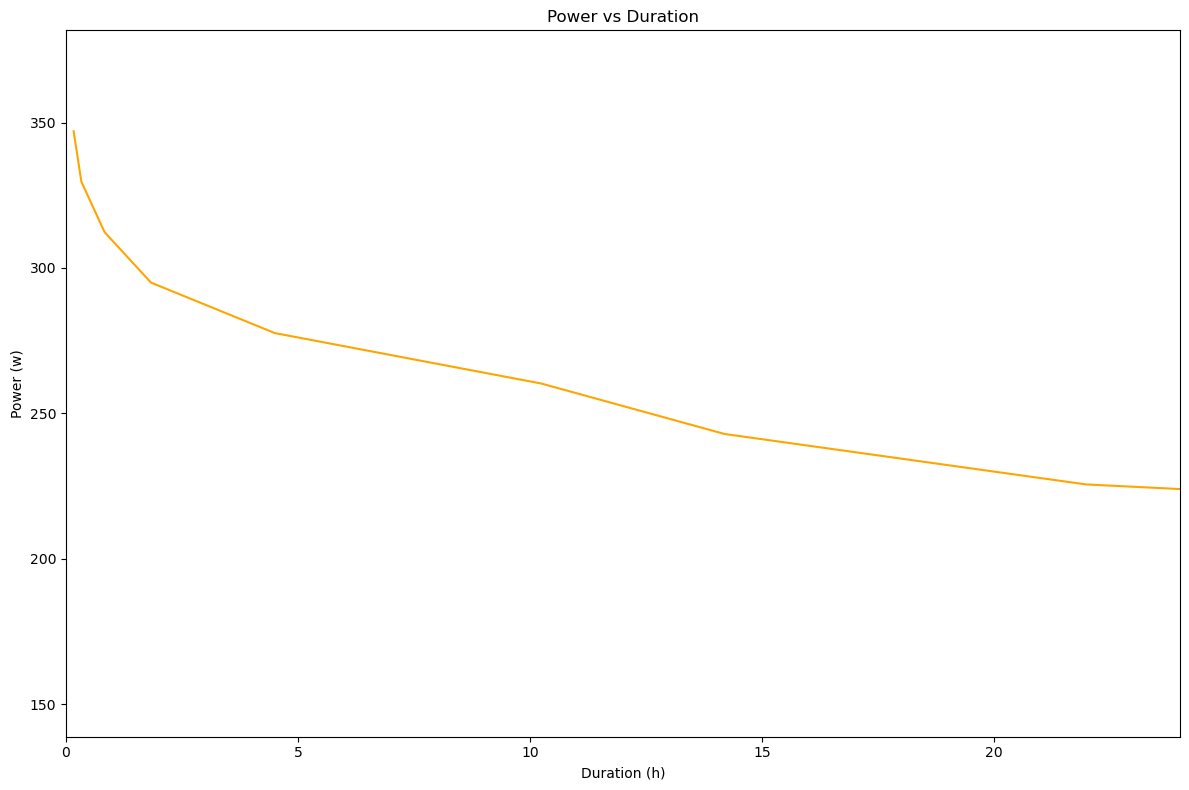

In [31]:
athlete.powerDuration.plotPowerDuration()

#### Glycogen Storage

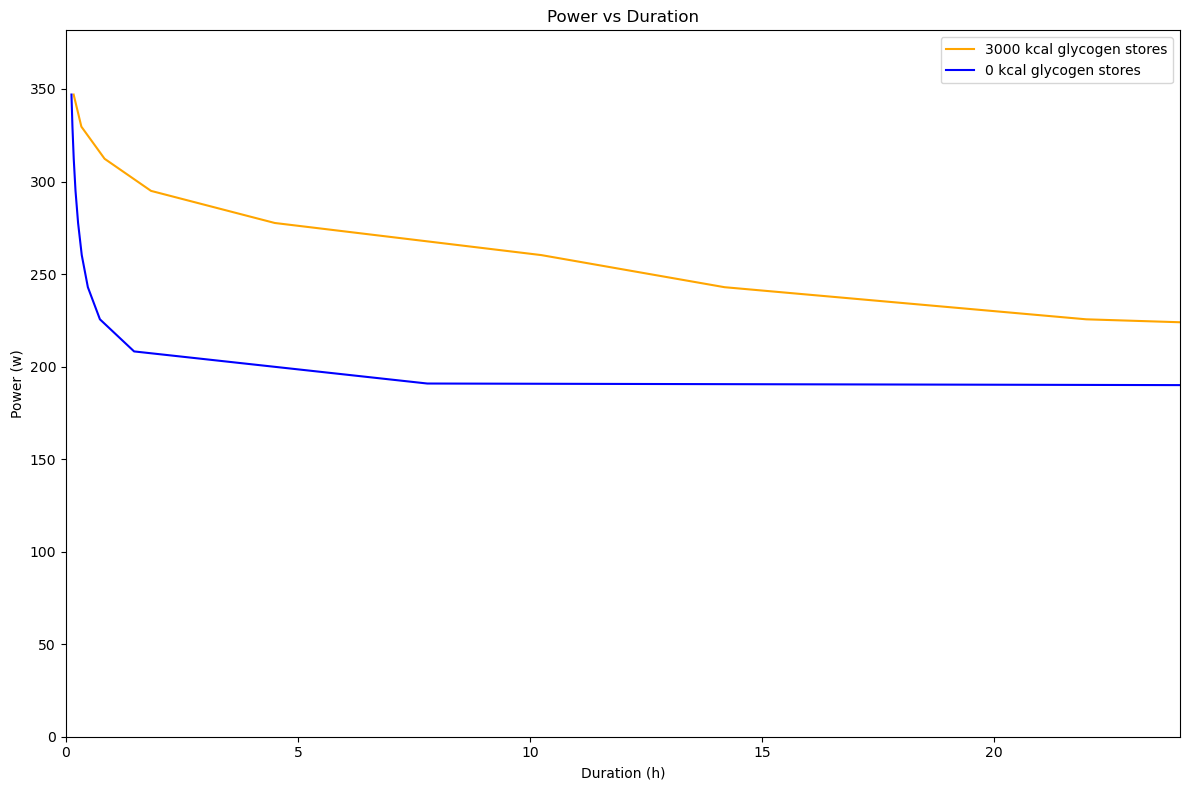

In [32]:
hungryRunner = bonk.Athlete(startingGlycogen=100)

fig1, ax1 = plt.subplots(figsize=plotSize)
ax1.plot(athlete.powerDuration.duration/3600,athlete.powerDuration.power,color='orange',label='3000 kcal glycogen stores')
ax1.plot(hungryRunner.powerDuration.duration/3600,hungryRunner.powerDuration.power,color='blue',label='0 kcal glycogen stores')
ax1.legend()
ax1.set_title('Power vs Duration')
ax1.set_xlabel('Duration (h)')
ax1.set_ylabel('Power (w)')
ax1.set_xlim(xmin=0,xmax=24)
ax1.set_ylim(ymin=athlete.vo2maxPower*0,ymax=athlete.vo2maxPower*1.1)
fig1.tight_layout()

#### Glucose Intake

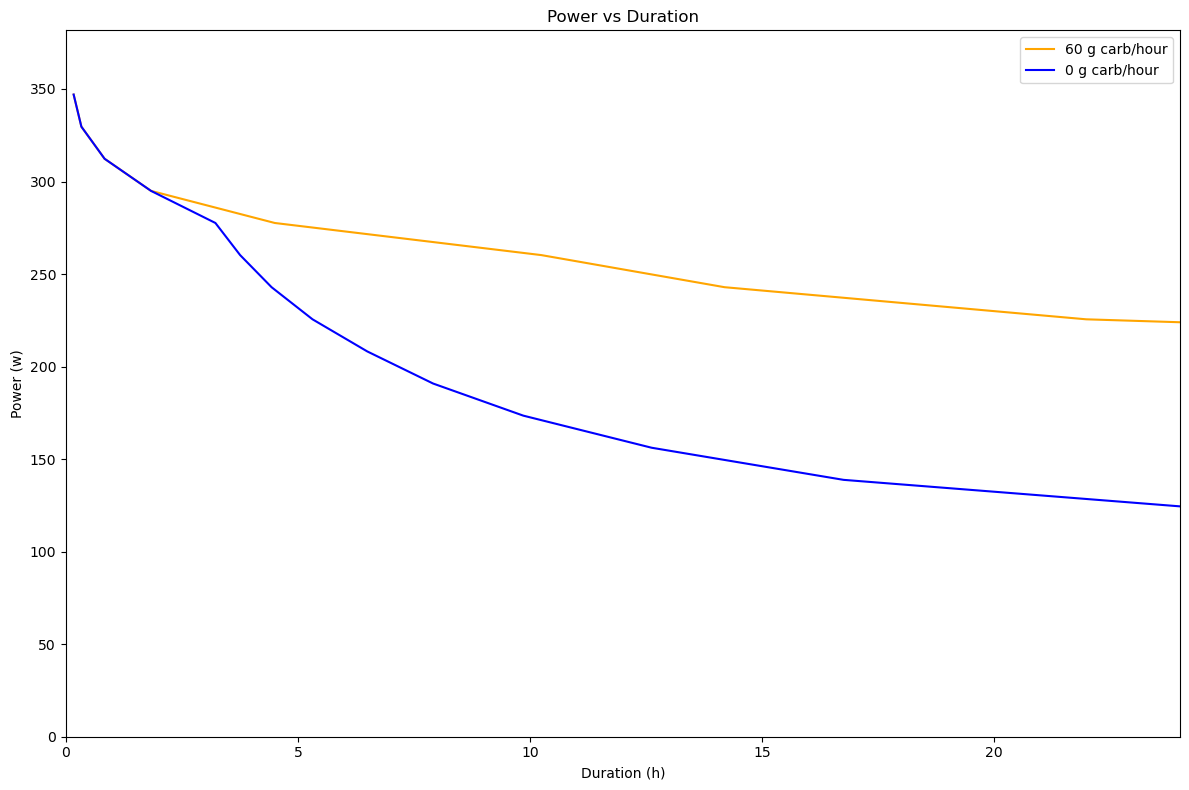

In [33]:
hungryRunner = bonk.Athlete(startingGlycogen=2000,glucoseConsumption = 0)

fig1, ax1 = plt.subplots(figsize=plotSize)
ax1.plot(athlete.powerDuration.duration/3600,athlete.powerDuration.power,color='orange',label='60 g carb/hour')
ax1.plot(hungryRunner.powerDuration.duration/3600,hungryRunner.powerDuration.power,color='blue',label='0 g carb/hour')
ax1.legend()
ax1.set_title('Power vs Duration')
ax1.set_xlabel('Duration (h)')
ax1.set_ylabel('Power (w)')
ax1.set_xlim(xmin=0,xmax=24)
ax1.set_ylim(ymin=athlete.vo2maxPower*0,ymax=athlete.vo2maxPower*1.1)
fig1.tight_layout()

#### Temperature and Humidity

#### Unmodeled Factors

## Race Time Estimation

### Why Even Power is Optimal

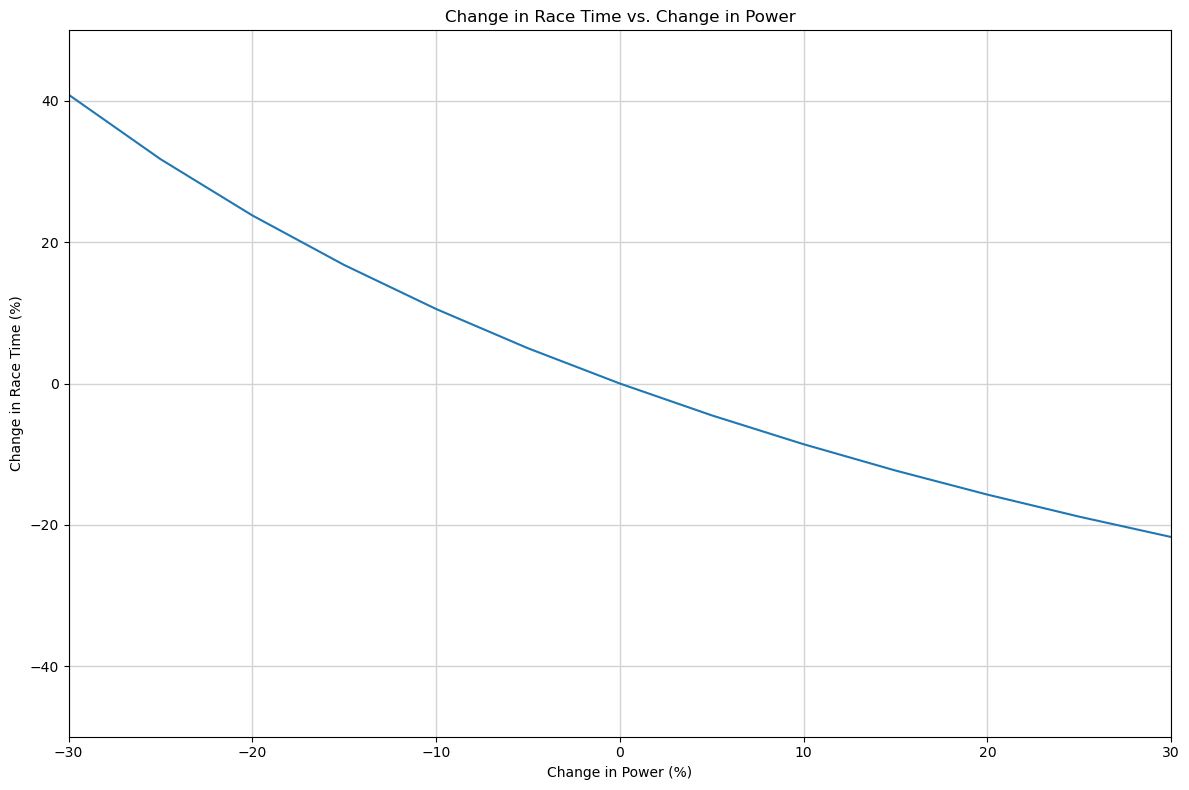

In [77]:
factors = np.arange(60,145,5)/100
durations = []
for factor in factors:
    power = 250*factor
    segmentPerformances = []
    duration = 0
    for segment in flatCourse.segments:
        segmentPerformance = bonk.SegmentPerformance(segment,athlete,environment,power)
        segmentPerformance.setStart(duration)
        segmentPerformances.append(segmentPerformance)
        duration += segmentPerformance.duration
    durations.append(duration)
    if factor == 1.0:
        normDuration = duration

fig1, ax1 = plt.subplots(figsize=plotSize)
ax1.plot(factors*100-100,(durations/normDuration*100-100))
ax1.set_title('Change in Race Time vs. Change in Power')
ax1.set_xlabel('Change in Power (%)')
ax1.set_ylabel('Change in Race Time (%)')
ax1.set_xlim(xmin=-30, xmax = 30)
ax1.set_ylim(ymin=-50, ymax = 50)
ax1.grid(color='lightgrey', linestyle='-', linewidth=1)
fig1.tight_layout()

## Example: Flat Marathon

Race time: h: 2  m: 53  s: 42.70589592298529


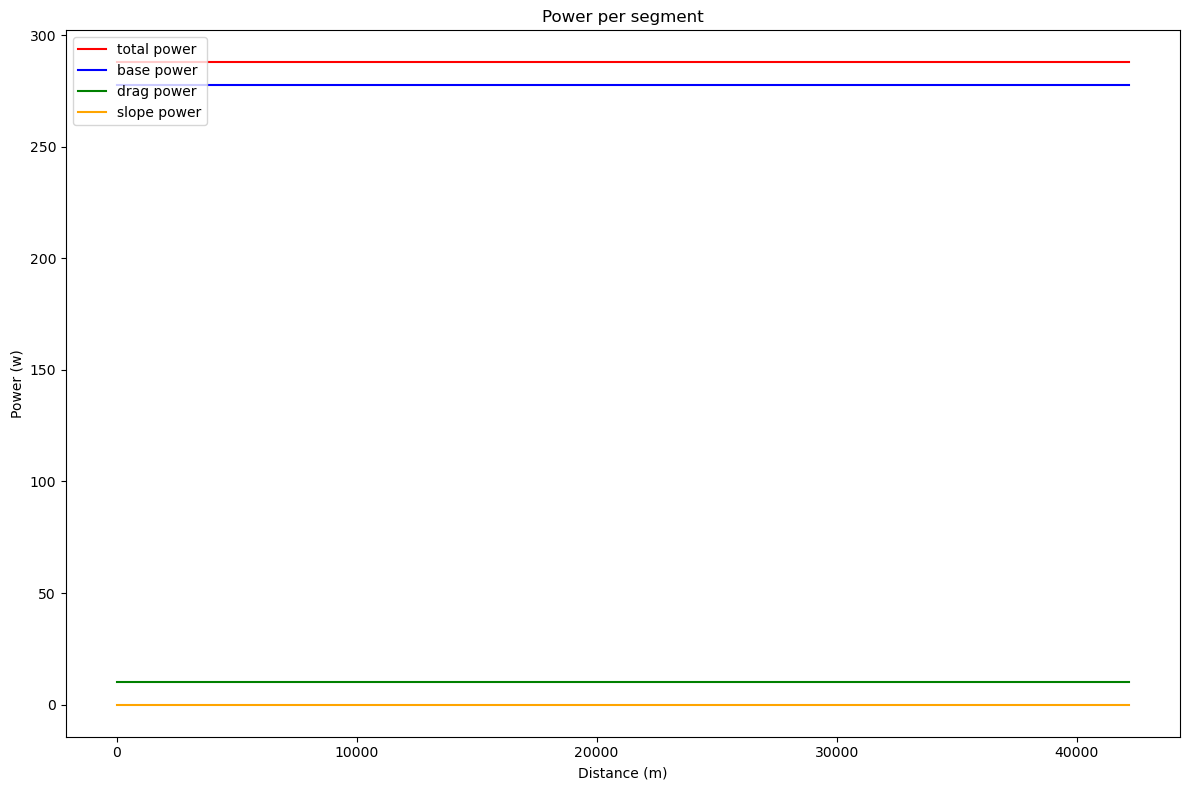

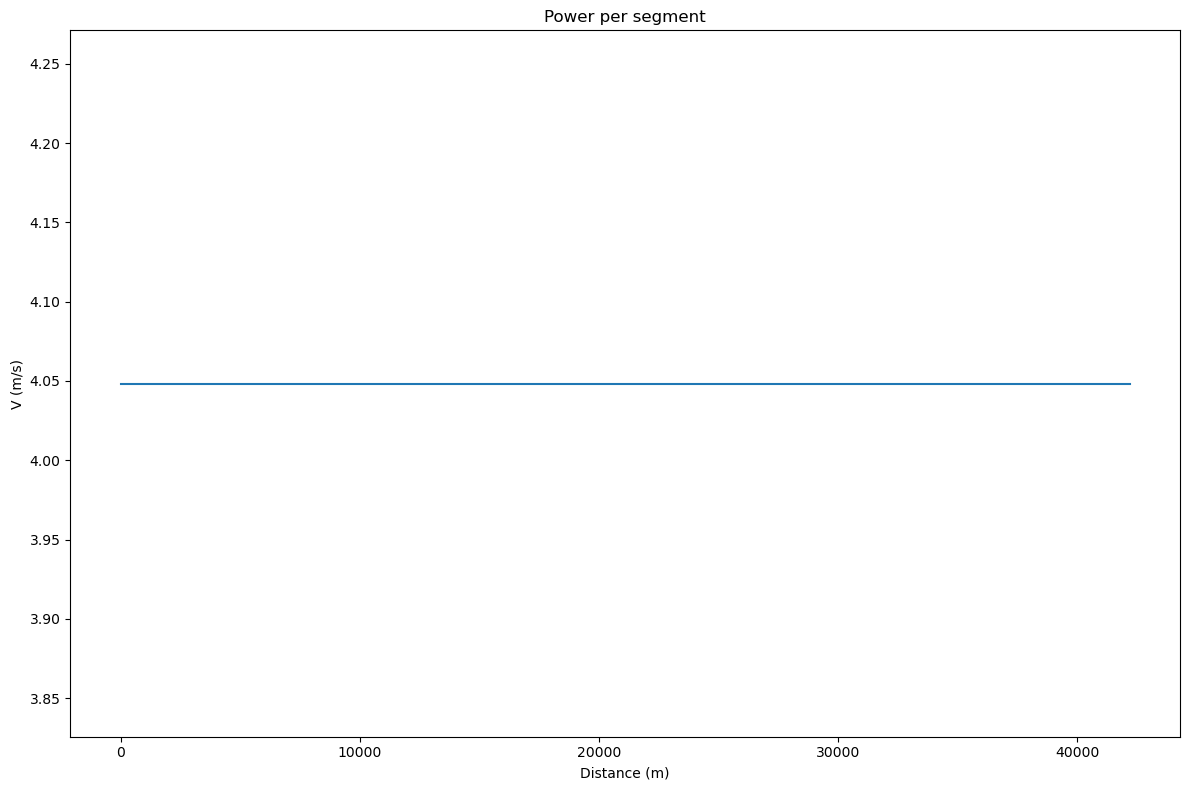

In [36]:
flatPerformance = bonk.Performance(environment,athlete,flatCourse)
raceTime, power = flatPerformance.getRaceTime()
h, m, s = bonk.getTime(raceTime)
print('Race time: h:',int(h), ' m:',int(m) ,' s:',s)

flatPerformance.plotPowerDistance()
flatPerformance.plotVDistance()

## Example: Boston Marathon

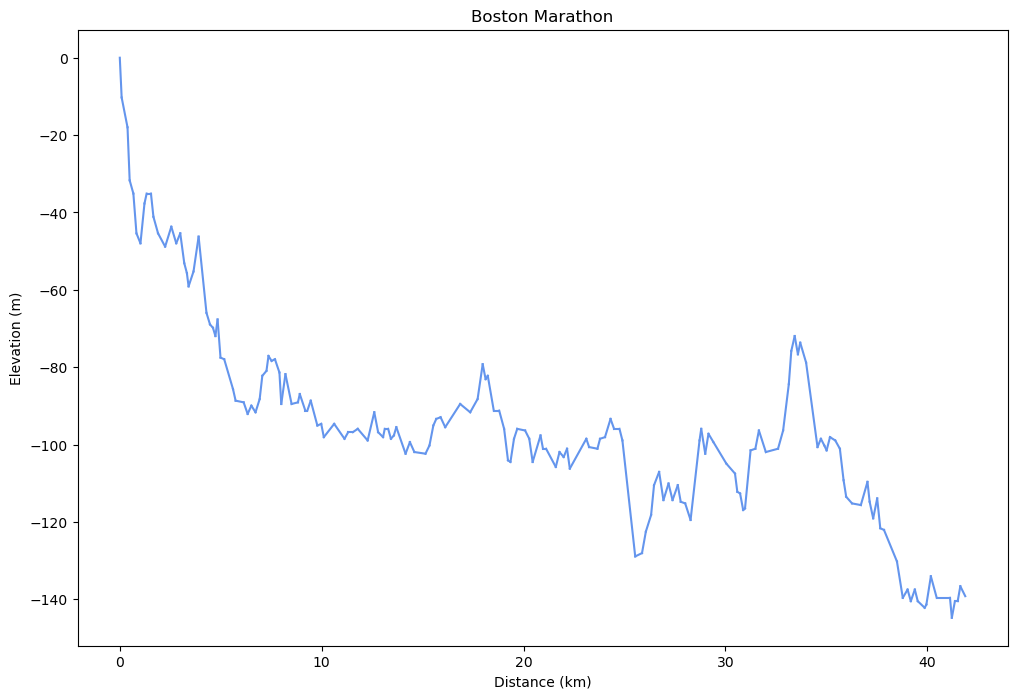

In [34]:
bostonCourse = bonk.readCourse('bostonCourse.csv','Boston Marathon')
flatCourse = bonk.readCourse('flatMarathon.csv','Flat Marathon')

bostonCourse.plotProfile()

Race time: h: 2  m: 51  s: 10.114230363653405


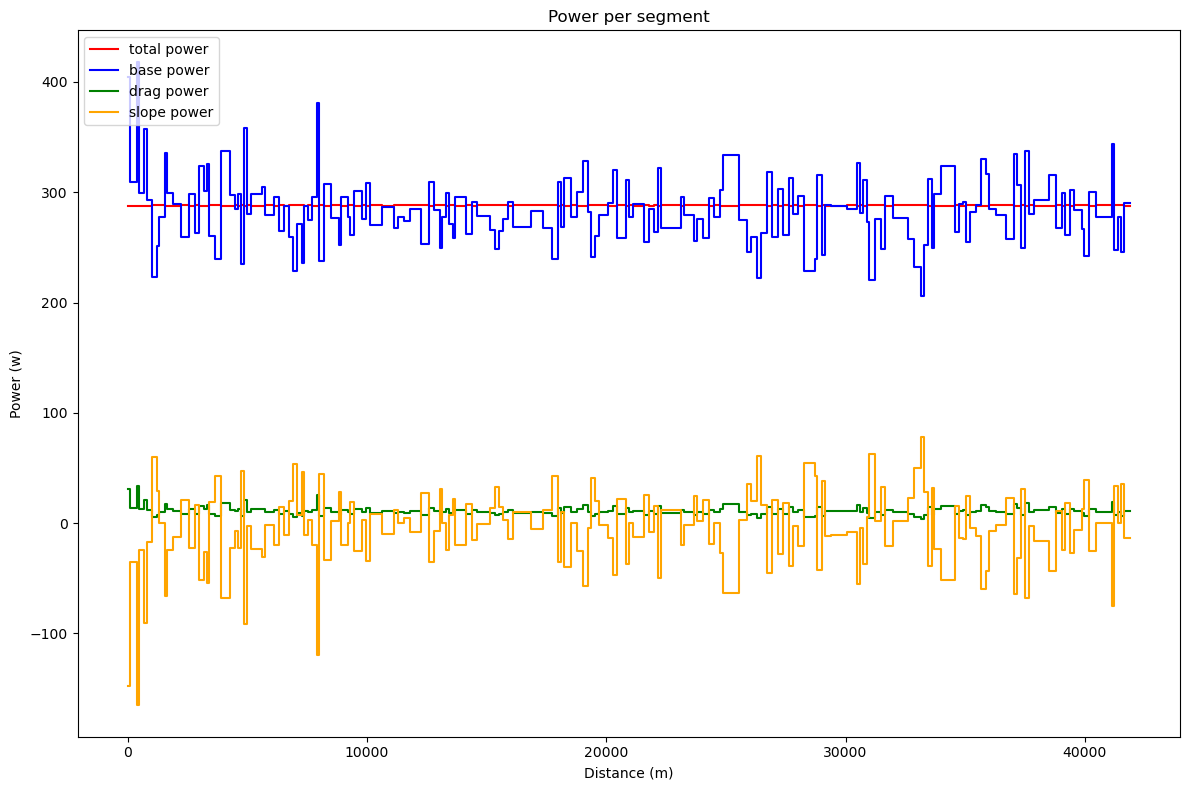

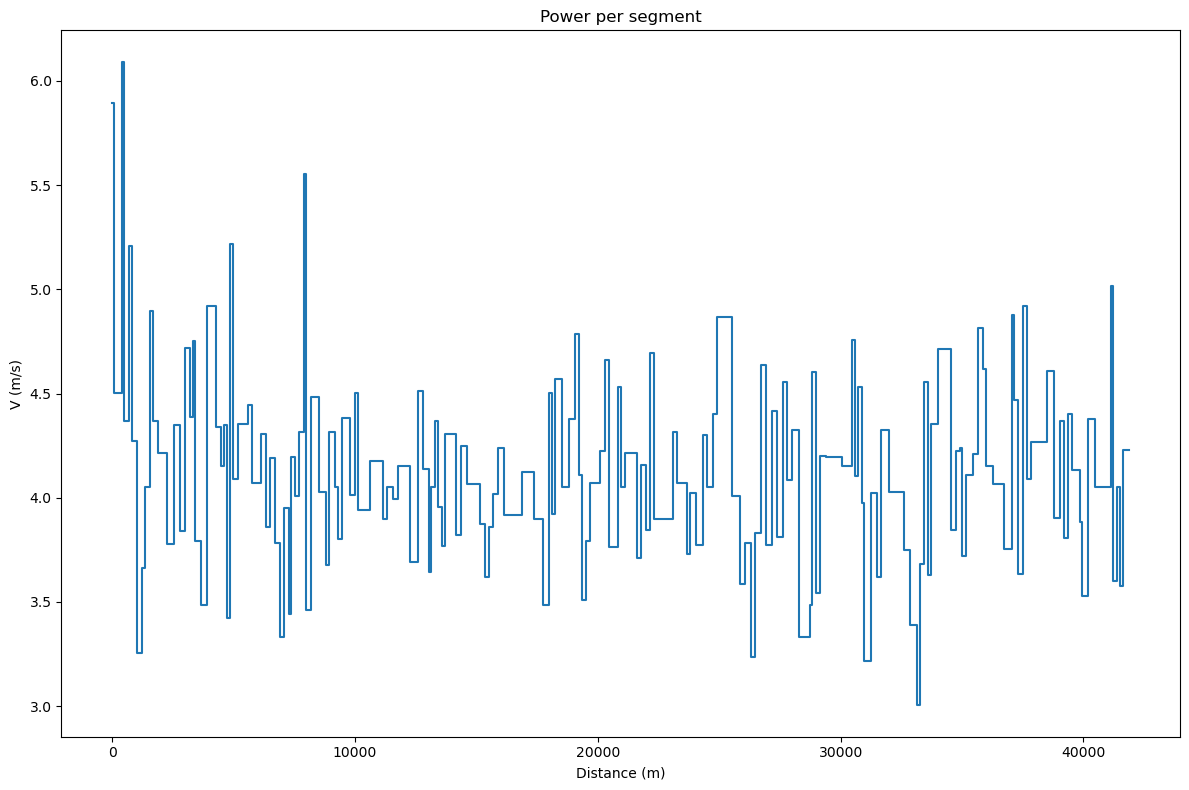

In [35]:
bostonPerformance = bonk.Performance(environment,athlete,bostonCourse)
raceTime, power = bostonPerformance.getRaceTime()
h, m, s = bonk.getTime(raceTime)
print('Race time: h:',int(h), ' m:',int(m) ,' s:',s)

bostonPerformance.plotPowerDistance()
bostonPerformance.plotVDistance()

## Example: Run Woodstock 100M

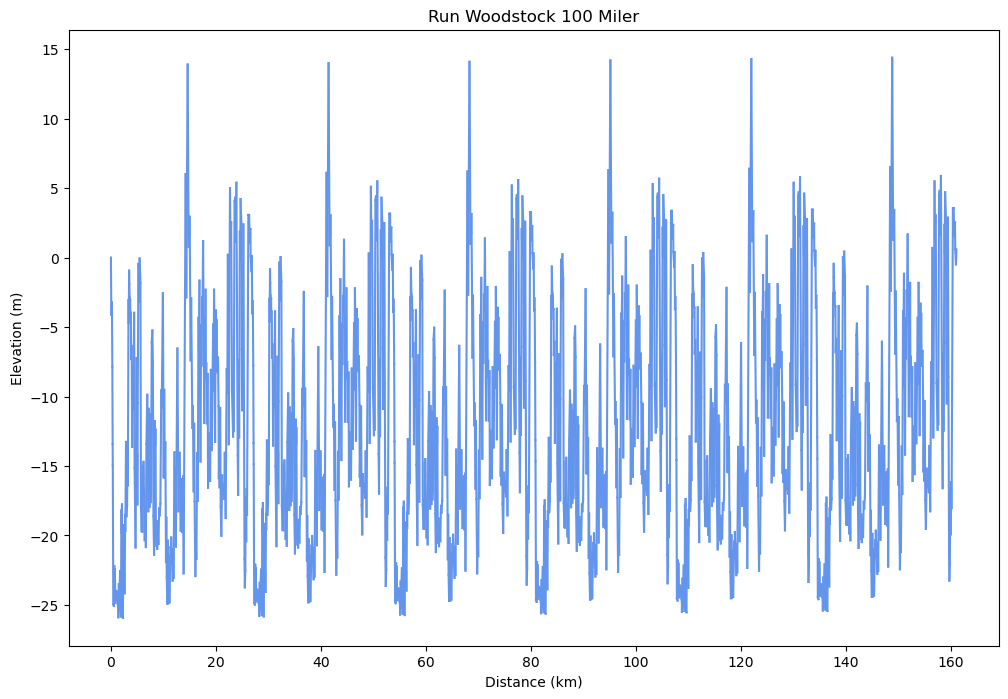

In [37]:
woodstockCourse = bonk.readCourse('woodstockCourse.csv','Run Woodstock 100 Miler')

woodstockCourse.plotProfile()

h: 13.0  m: 14.0  s: 39.11161067571811


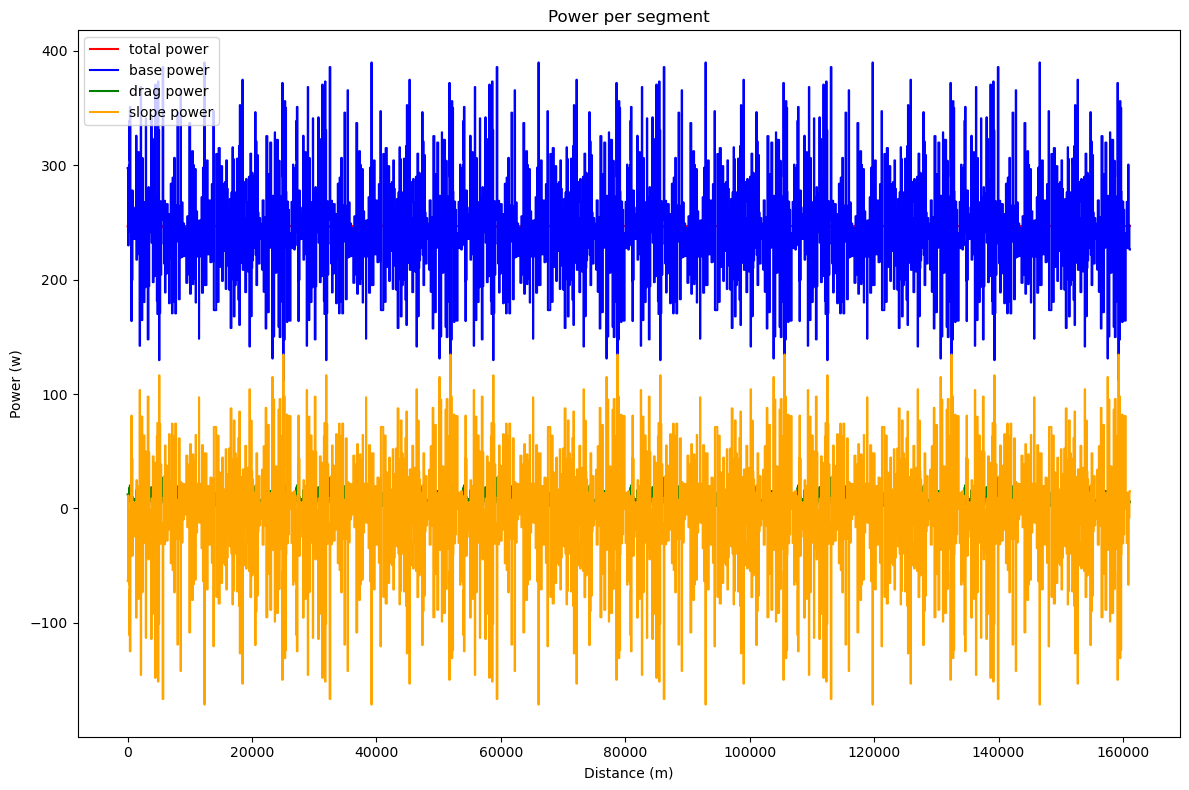

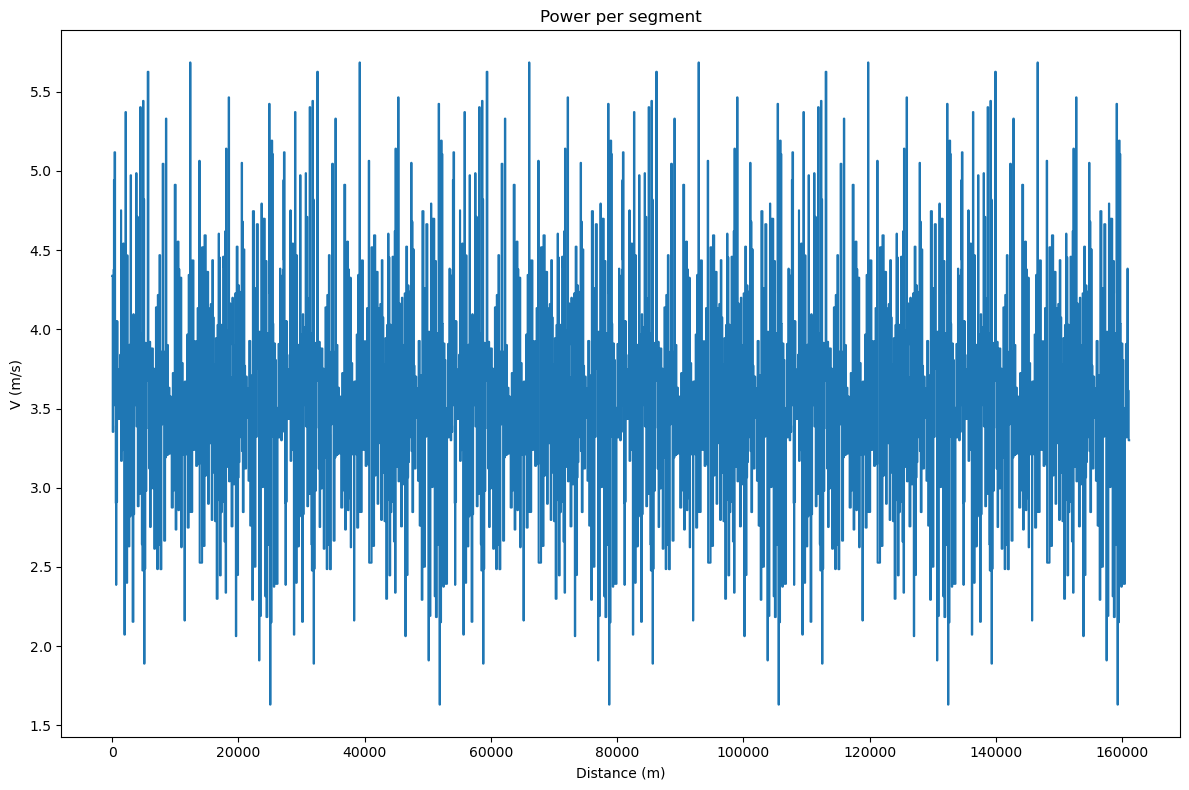

In [38]:
woodstockPerformance = bonk.Performance(environment,athlete,woodstockCourse)
raceTime, power = woodstockPerformance.getRaceTime()
h, m, s = bonk.getTime(raceTime)
print('h:',h, ' m:',m ,' s:',s)

woodstockPerformance.plotPowerDistance()
woodstockPerformance.plotVDistance()

In [39]:
fortyKCourse = bonk.readCourse('40k.csv','40k course')
power = 295
duration = 0
segmentPerformances = []
for segment in fortyKCourse.segments:
    segmentPerformance = bonk.SegmentPerformance(segment,athlete,environment,power)
    segmentPerformance.setStart(duration)
    segmentPerformances.append(segmentPerformance)
    duration += segmentPerformance.duration

print(duration)

9663.267529345985


In [40]:
fortyKCourse = bonk.readCourse('40k.csv','40k course')
power = 295
duration = 0
segmentPerformances = []
toggle = 0
for segment in fortyKCourse.segments:
    if toggle:
        segmentPerformance = bonk.SegmentPerformance(segment,athlete,environment,power-power*0.2)
        segmentPerformance.setStart(duration)
        segmentPerformances.append(segmentPerformance)
        duration += segmentPerformance.duration
        toggle = 0
    else:
        segmentPerformance = bonk.SegmentPerformance(segment,athlete,environment,power+power*0.2)
        segmentPerformance.setStart(duration)
        segmentPerformances.append(segmentPerformance)
        duration += segmentPerformance.duration
        toggle = 1
print(duration)

10048.227629553026


In [41]:
hillyfortyKCourse = bonk.readCourse('hilly40k.csv','hilly 40k course')
power = 295
duration = 0
segmentPerformances = []
toggle = 0
for segment in hillyfortyKCourse.segments:
    if toggle:
        segmentPerformance = bonk.SegmentPerformance(segment,athlete,environment,power-power*0.1)
        segmentPerformance.setStart(duration)
        segmentPerformances.append(segmentPerformance)
        duration += segmentPerformance.duration
        toggle = 0
    else:
        segmentPerformance = bonk.SegmentPerformance(segment,athlete,environment,power+power*0.1)
        segmentPerformance.setStart(duration)
        segmentPerformances.append(segmentPerformance)
        duration += segmentPerformance.duration
        toggle = 1
print(duration)

9723.577816796089
